<a href="https://colab.research.google.com/github/m-umamaheshwari/Covid19/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn gradio


In [ ]:
import pandas as pd

url = '/content/covid data.xlsx'
df = pd.read_excel(url)
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Country,Confirmed,Recovered,Deaths,Days,Unnamed: 6,Unnamed: 7,Unnamed: 8,1199.806061,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2020-01-22,China,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-2960.327273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,India,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,Canada,2.0,2.0,44.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,Australia,3.0,2.0,44.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,Brazil,44.0,2.0,88.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

url = "/content/covid data.xlsx"
df = pd.read_excel(url)

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 21
Number of columns: 17


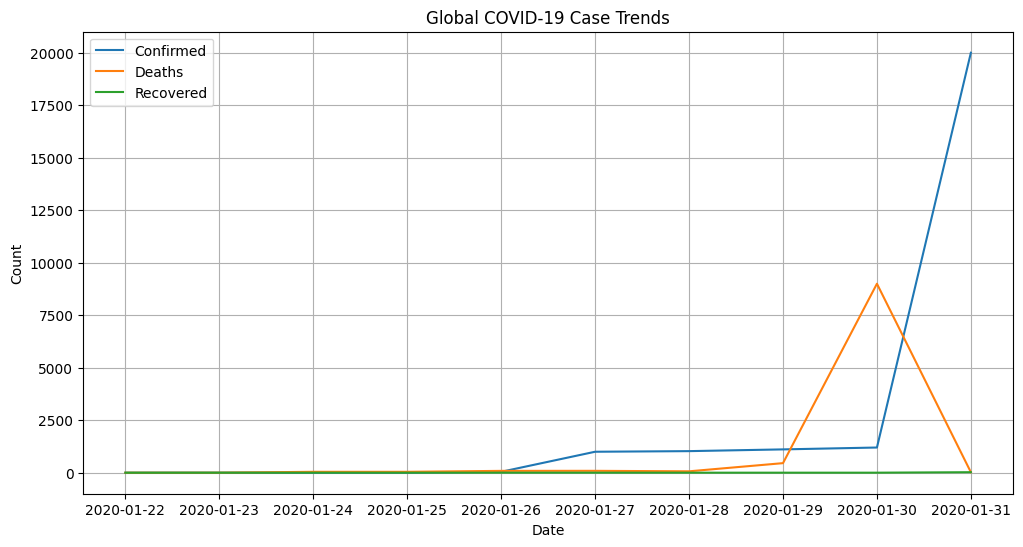

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Global trend
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered')
plt.legend()
plt.title("Global COVID-19 Case Trends")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


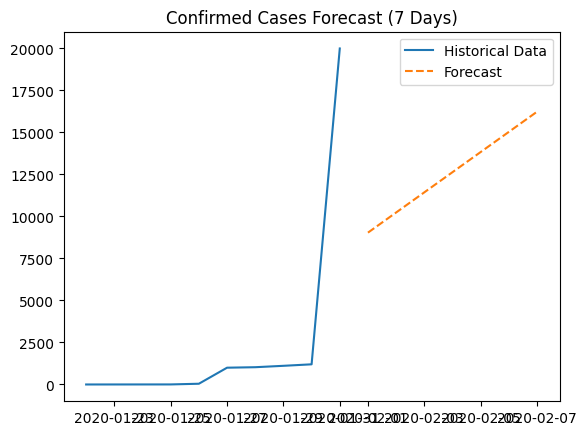

In [ ]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Forecast Confirmed Cases
global_df['Days'] = (global_df['Date'] - global_df['Date'].min()).dt.days

X = global_df[['Days']]
y = global_df['Confirmed']

model = LinearRegression()
model.fit(X, y)

# Predict for next 7 days
future_days = np.arange(global_df['Days'].max() + 1, global_df['Days'].max() + 8).reshape(-1, 1)
future_preds = model.predict(future_days)

# Plot
plt.plot(global_df['Date'], y, label='Historical Data')
future_dates = pd.date_range(global_df['Date'].max() + pd.Timedelta(days=1), periods=7)
plt.plot(future_dates, future_preds, '--', label='Forecast')
plt.legend()
plt.title("Confirmed Cases Forecast (7 Days)")
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import gradio as gr

#  Load data
url = '/content/covid data.xlsx'
df = pd.read_excel(url)
df['Date'] = pd.to_datetime(df['Date'])
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
global_df['Days'] = (global_df['Date'] - global_df['Date'].min()).dt.days

#  ML model
X = global_df[['Days']]
y = global_df['Confirmed']
model = LinearRegression()
model.fit(X, y)

# Plotting function
def plot_forecast(days_ahead):
    last_day = global_df['Days'].max()
    future_days = np.arange(last_day + 1, last_day + days_ahead + 1).reshape(-1, 1)
    preds = model.predict(future_days)
    future_dates = pd.date_range(global_df['Date'].max() + pd.Timedelta(days=1), periods=days_ahead)

    plt.figure(figsize=(10, 5))
    plt.plot(global_df['Date'], y, label=' Historical Confirmed Cases', color='#0077b6')
    plt.plot(future_dates, preds, '--', label=' Predicted', color='#f72585')
    plt.xlabel(" Date")
    plt.ylabel(" Confirmed Cases")
    plt.title("COVID-19 Confirmed Case Forecast", fontsize=16, color="#222")
    plt.legend()
    plt.grid(True)
    return plt

#  Prediction text
def predict_text(days_ahead):
    last_day = global_df['Days'].max()
    pred = int(model.predict([[last_day + days_ahead]])[0])
    return f" In {days_ahead} days, expected confirmed cases: 🧍 {pred:,}"

# Gradio App
with gr.Blocks(theme=gr.themes.Soft(primary_hue="pink")) as demo:
    gr.Markdown(
        """


            COVID-19 Case Predictor
            Predict future confirmed cases based on real data

        """
    )

    with gr.Row():
        slider = gr.Slider(1, 30, step=1, label=" Days into Future")
        btn = gr.Button(" Predict")

    with gr.Row():
        txt_output = gr.Textbox(label=" Prediction Result")
        plot_output = gr.Plot()

    btn.click(fn=predict_text, inputs=slider, outputs=txt_output)
    btn.click(fn=plot_forecast, inputs=slider, outputs=plot_output)

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f16a5caca5d6e2b96.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
